In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
data=pd.read_csv("Digits/train.csv")

In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
np.sqrt(784)

28.0

In [10]:
img=data.iloc[3,1:].values.reshape(28,28)
img.shape

(28, 28)

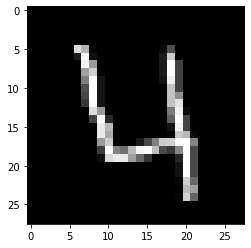

In [12]:
plt.imshow(img,cmap="gray")

## Decision tree classifier

In [15]:
x=data.iloc[:,1:].values
y=data.iloc[:,0].values

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
model=DecisionTreeClassifier()

In [18]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred=model.predict(x_test)

In [20]:
y_pred

array([3, 6, 9, ..., 8, 7, 2])

In [21]:
accuracy_score(y_test,y_pred)

0.8551190476190477

In [22]:
y_test[0]

3

In [23]:
y_pred[0]

3

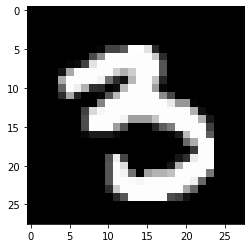

In [24]:
img=x_test[0].reshape(28,28)
plt.imshow(img,cmap="gray")

In [31]:
confusion_matrix(y_test,y_pred)

array([[741,   0,  10,   3,   2,  16,  12,   4,   9,  16],
       [  2, 925,  10,   6,   3,   2,   4,   1,   8,   0],
       [  9,  16, 712,  22,   8,  17,  17,  24,  27,   8],
       [  8,   5,  34, 689,   6,  47,   3,  22,  27,  22],
       [  4,   6,   6,   8, 702,  11,  18,  12,  21,  39],
       [  9,   7,  11,  44,   9, 605,  19,   6,  21,  25],
       [ 14,   2,  12,   3,  15,  17, 757,   5,  13,   3],
       [  4,   5,  24,  13,  10,   8,   4, 799,   6,  26],
       [  8,  15,  19,  28,  13,  38,  19,   7, 597,  24],
       [  6,   3,  11,  25,  45,  15,   3,  24,  24, 656]])

Text(33.0, 0.5, 'Actual')

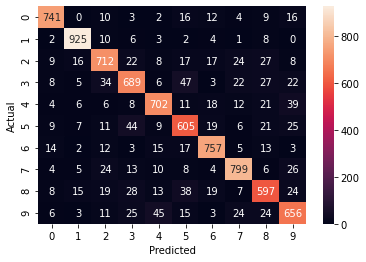

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       813
           1       0.94      0.96      0.95       961
           2       0.84      0.83      0.83       860
           3       0.82      0.80      0.81       863
           4       0.86      0.85      0.86       827
           5       0.78      0.80      0.79       756
           6       0.88      0.90      0.89       841
           7       0.88      0.89      0.89       899
           8       0.79      0.78      0.79       768
           9       0.80      0.81      0.80       812

    accuracy                           0.86      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.86      0.85      8400



## Testing with non-labled test dataset

In [25]:
new_data=pd.read_csv("Digits/test.csv")

In [26]:
new_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


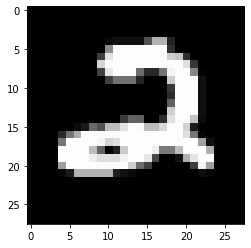

In [29]:
img=new_data.iloc[0,:].values.reshape(28,28)
plt.imshow(img,cmap="gray")

In [30]:
model.predict(new_data.iloc[0,:].values.reshape(1,784))

array([2])